In [3]:
from glob import glob
image_folder = './'

types = ('png', 'jpg') # the tuple of file types
img_paths = []
for t in types:
    img_paths.extend(glob(image_folder + '*.{}'.format(t)))

xml_paths = glob(image_folder + '*.xml')

assert len(img_paths) == len(xml_paths),\
    "dataset issue: # of images = {} , and # of xml files = {}".format( len(imgs),
                                                                        len(xmls)
                                                                        )


In [5]:
img_paths

['./001.png']

In [15]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [17]:
def removeAxeEdge(ax):
    for loc, spine in ax.spines.items():
        spine.set_color('none')
        
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks([])

In [23]:
import os

def get_xml_from_image(img_path):
    p,f = os.path.split(img_path)
    name,ext = f.split('.')
    return os.path.join(p, name + '.xml')

#test function
get_xml_from_image(img_paths[0])

'./001.xml'

In [33]:
import re

def parse_xml(xml_path):
    with open(xml_path, 'r') as f:
        text = f.read()
    print("text= ", text)
    p_name = re.compile("<name>\s*(.*)\s*</name>")
    result = p_name.search(text)
    name = result.group(1)

    p_xmin = re.compile("<xmin>\s*(.*)\s*</xmin>")
    result = p_xmin.search(text)
    xmin = result.group(1)

    p_xmax = re.compile("<xmax>\s*(.*)\s*</xmax>")
    result = p_xmax.search(text)
    xmax = result.group(1)

    p_ymin = re.compile("<ymin>\s*(.*)\s*</ymin>")
    result = p_ymin.search(text)
    ymin = result.group(1)

    p_ymax = re.compile("<ymax>\s*(.*)\s*</ymax>")
    result = p_ymax.search(text)
    ymax = result.group(1)

    p_width = re.compile("<width>\s*(.*)\s*</width>")
    result = p_width.search(text)
    img_width = result.group(1)

    p_height = re.compile("<height>\s*(.*)\s*</height>")
    result = p_height.search(text)
    img_height = result.group(1)

    bottom = int(ymax) 
    left = int(xmin)
    width = abs(int(xmax) - int(xmin)) 
    height = abs(int(ymax) - int(ymin)) 
    img_height = int(img_height)
    img_width = int(img_width)
    return (bottom, left, width, height, img_width, img_height)

text=  <annotation>
	<folder>2</folder>
	<filename>1.png</filename>
	<path>C:\Users\Aaron Liu\Desktop\2\1.png</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1920</width>
		<height>1080</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>4710594924427</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>553</xmin>
			<ymin>461</ymin>
			<xmax>812</xmax>
			<ymax>686</ymax>
		</bndbox>
	</object>
	<object>
		<name>4710423051096</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>901</xmin>
			<ymin>798</ymin>
			<xmax>1247</xmax>
			<ymax>998</ymax>
		</bndbox>
	</object>
</annotation>

x, y, w, h = 553,686,259,225


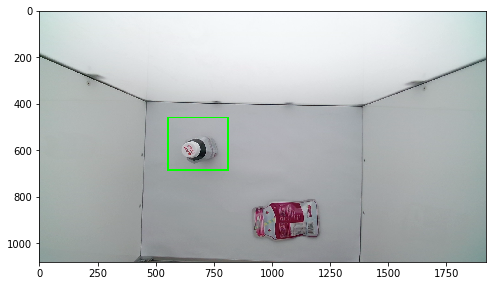

In [37]:
for img_path in img_paths:
    xml_path = get_xml_from_image(img_path)
    
    bottom, left, width, height, img_width, img_height = parse_xml(xml_path)
    
    image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    x, y, w, h = left , bottom, width, height
    print("x, y, w, h = {},{},{},{}".format(x, y, w, h))
    cv2.rectangle(image, (x, y), (x+w, y-h), (0, 255, 0), 5)
    fig=plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
#     removeAxeEdge(ax)
    plt.imshow(image)
    plt.show()